# **Experiment 3 - Classification with RandomForest**


In this notebook, we will load and read the data, preprocess the data and assess the baseline model. 

The steps include:
   
   1. Load and Explore Dataset
      * 1a. Training Dataset
      * 1b. Testing Dataset
   2. Prepare Data
      * 2a. Training Dataset
      * 2b. Testing Dataset
   3. Data Sampling
   4. Features Elimination with Correlation Matrix
   5. Scale Data
   6. Split Dataset
   7. Assess Baseline Model

# 1. Load and Explore Dataset

In [179]:
# Launch magic commands to automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
# Install the my_krml_14195743 custom package with pip
!pip install -i https://test.pypi.org/simple/ my-krml-14195743

Looking in indexes: https://test.pypi.org/simple/


In [181]:
# Import the pandas and numpy package
import pandas as pd
import numpy as np

## 1a. Training Dataset

In [182]:
# Load the training dataset and save as df_train
df_train = pd.read_csv('../data/raw/advmla-2023-spring/train.csv')

C:\Users\this\AppData\Local\Temp\ipykernel_6916\125755527.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/raw/advmla-2023-spring/train.csv')


In [183]:
# Display the first 5 row of df_train
df_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [184]:
# Display the shape of df_train
df_train.shape

(56091, 64)

From the shape of dataframe df_train, we can know that this dataframe contains 64 columns and 56,091 rows.

In [185]:
# Display the information of df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [186]:
# Display the descriptive statistics of df_train
df_train.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,...,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,...,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,...,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,...,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,...,0.992335,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,0.000000
max,41.000000,98.000000,834.000000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,...,225.485000,78.985500,5.933300,11.545500,14.533300,10.000000,4.000000,5.258100,30.090900,1.000000


## 1b. Testing Dataset

In [187]:
# Load the training dataset and save as df_test
df_test = pd.read_csv('../data/raw/advmla-2023-spring/test.csv')

In [188]:
# Display the first 5 row of df_test
df_test.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


In [189]:
# Display the shape of df_test
df_test.shape

(4970, 63)

From the shape of dataframe df_test, we can know that this dataframe contains 63 columns and 4,970 rows.

In [190]:
# Display the information of df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

In [191]:
# Display the descriptive statistics of df_test
df_test.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,...,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,10.356801,18.962254,...,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262
std,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,9.427192,13.255566,...,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,4.300000,13.100000,...,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175
50%,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,8.600000,18.100000,...,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900
75%,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,14.500000,23.400000,...,25.991375,1.103500,1.049540,1.000000,2.882400,3.800000,1.533300,0.807700,0.333300,9.000000
max,33.000000,96.000000,391.200000,48.200000,150.000000,150.000000,231.800000,121.100000,100.000000,100.000000,...,38.800000,160.805000,71.811500,5.148100,10.681800,15.000000,8.400000,3.565200,3.640000,25.333300


# 2. Prepare Data

## 2a. Training Dataset

In [192]:
# Make a copy of df_train and save as df_train_cleaned
df_train_cleaned = df_train.copy()

First, we will consider which columns are not relevant to our prediction task. After identifying them, we will remove them from the dataset.

* Column `type`: There is only one value in this column, which is 'all'. Hence there is no need to keep this column.
* Column `player_id`: This column does not play any role in the prediction task.

In [193]:
# Remove columns with objects datatype from the dataset
df_train_cleaned.drop(df_train_cleaned[['type', 'player_id']], axis=1, inplace=True)

Next, in column `yr`, there should be only certain values, including Jr, Fr, So, Sr. However, this column also contains invalid values, including "None", "0", "42.9", "57.1". Therefore, we will replace these values with NaN values.

In [194]:
df_train_cleaned = df_train_cleaned.replace({'yr': {'None': np.NaN, 0: np.NaN, 42.9: np.NaN, 57.1: np.NaN}})

In column `ht`, there should be only certain values, including Jr, Fr, So, Sr. However, this column also contains invalid values, including "None", "0", "42.9", "57.1". Therefore, we will replace these values with NaN values.

In [195]:
def convert_ht(text):
    # Split the string value by the hyphen
    parts = str(text).split("-")
    result = ""
    # Define a dictionary to map month names to numbers
    month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7}
    
    # Check if the parts list contains two elements
    if len(parts) == 2:
        # Save the second location of the parts list as month
        month = parts[1]
        # Check if month in month_map, then result is f"{month_number}.{parts[0]}". If month is 00 and parts[0] in month_map, then result is f"{month_number}.1"
        if month in month_map:
            month_number = month_map[month]
            result = f"{month_number}.{parts[0]}"
        elif month == "00" and parts[0] in month_map:
            month_number = month_map[parts[0]]
            result = f"{month_number}.1"
    #If not, replace as NaN value
    else:
        result = np.NaN
    
    return result

In [196]:
# Apply the conversion function to the ht column
df_train_cleaned["ht"] = df_train_cleaned["ht"].apply(convert_ht)

In [197]:
# Covert column ht to float data type
df_train_cleaned["ht"] = pd.to_numeric(df_train_cleaned["ht"], errors='coerce')

Column `num` is supposed to contain numerical values only. Hence we will replace any non-numeric values with NaN values.

In [198]:
df_train_cleaned['num'] = pd.to_numeric(df_train_cleaned['num'], errors='coerce')

In [199]:
# Check if there is any columns with missing values
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

For those columns with missing values more than 50% of the total values, we decide to remove them from the dataframe. For the rest, we will fill the missing values with the mean value of that column. 

In [200]:
# Remove columns with more than 50% missing values from the dataframe
df_train_cleaned.drop(df_train[['Rec_Rank', 'dunks_ratio', 'pick']], axis=1, inplace=True)

In [201]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [202]:
# Instatiate the LabelEncoder method and save as le
le = LabelEncoder()

In [203]:
# Create new columns `team_new`,`conf_new`, `yr_new` to fit and transform the label encoded columns ('team', 'conf', 'yr')
df_train_cleaned['team_new'] = le.fit_transform(df_train_cleaned['team'])
df_train_cleaned['conf_new'] = le.fit_transform(df_train_cleaned['conf'])
df_train_cleaned['yr_new'] = le.fit_transform(df_train_cleaned['yr'])

df_train_cleaned .head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dreb,treb,ast,stl,blk,pts,drafted,team_new,conf_new,yr_new
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,267,27,5
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,327,33,5
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,272,7,6
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,231,34,6
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,228,10,6


In [204]:
# Drop column `team`, `yr` and `conf`
df_train_cleaned.drop(df_train_cleaned[['team', 'conf', 'yr']], axis=1, inplace=True)
df_train_cleaned

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dreb,treb,ast,stl,blk,pts,drafted,team_new,conf_new,yr_new
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,267,27,5
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,327,33,5
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,272,7,6
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,231,34,6
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,228,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,198,17,3
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0,217,31,5
56088,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,...,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0,297,30,3
56089,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0,332,29,3


In [205]:
# Replace all missing values with mean values of corresponding columns
df_train_cleaned.fillna(df_train_cleaned.mean()[0], inplace=True)

In [206]:
# Check if there is still any missing values
df_train_cleaned.isna().sum()

GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
ht                     0
num                    0
porpag                 0
adjoe                  0
pfr                    0
year                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
drtg                   0
adrtg                  0
dporpag                0


So all the rows have been filled with values.

In [207]:
# Show the first 5 rows of the df_train_cleaned dataframe
df_train_cleaned.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dreb,treb,ast,stl,blk,pts,drafted,team_new,conf_new,yr_new
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,267,27,5
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,327,33,5
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,272,7,6
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,231,34,6
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,228,10,6


## 2b. Testing Dataset

In [208]:
# Make a copy of df_test and save as df_test_cleaned
df_test_cleaned = df_test.copy()

First, similar to the training dataset, we will remove columns are not relevant to our prediction task, including `ht`, `type`, and `player_id`.

In [209]:
# Remove columns with objects datatype from the dataset
df_test_cleaned.drop(df_test[['type', 'player_id']], axis=1, inplace=True)

In [210]:
# Apply the conversion function to the ht column
df_test_cleaned["ht"] = df_test_cleaned['ht'].apply(convert_ht)

In [211]:
# Covert column ht to float data type
df_test_cleaned["ht"] = pd.to_numeric(df_test_cleaned["ht"], errors='coerce')

Next, in column `yr`, there should be only certain values, including Jr, Fr, So, Sr. However, this column also contains invalid value which is "None". Therefore, we will replace this value with NaN values.

In [212]:
df_test_cleaned = df_test_cleaned.replace({'yr': {'None': np.NaN}})

Column `num` is supposed to contain numerical values only. Hence we will replace "None" (string value) with NaN values.

In [213]:
df_test_cleaned['num'] = pd.to_numeric(df_test_cleaned['num'], errors='coerce')

In [214]:
# Check if there is any columns with missing values
df_test_cleaned.isna().sum()

team       0
conf       0
GP         0
Min_per    0
Ortg       0
          ..
treb       0
ast        0
stl        0
blk        0
pts        0
Length: 61, dtype: int64

For those columns with missing values more than 50% of the total values, we decide to remove them from the dataframe. For the rest, we will fill the missing values with the mean value of that column.

In [215]:
# Remove columns with more than 50% missing values from the dataframe
df_test_cleaned.drop(df_test_cleaned[['Rec_Rank', 'dunks_ratio', 'pick']], axis=1, inplace=True)

In [216]:
# Instatiate the LabelEncoder method and save as le
le = LabelEncoder()

In [217]:
# Create new columns `team_new`,`conf_new`, `yr_new` to fit and transform the label encoded columns ('team', 'conf', 'yr')
df_test_cleaned['team_new'] = le.fit_transform(df_test_cleaned['team'])
df_test_cleaned['conf_new'] = le.fit_transform(df_test_cleaned['conf'])
df_test_cleaned['yr_new'] = le.fit_transform(df_test_cleaned['yr'])
df_test_cleaned .head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,oreb,dreb,treb,ast,stl,blk,pts,team_new,conf_new,yr_new
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,178,16,3
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,258,16,3
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,23,2,3
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,115,5,3
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,123,6,3


In [218]:
# Drop column `team`, `conf`, `yr`
df_test_cleaned.drop(df_test_cleaned[['team', 'conf', 'yr']], axis=1, inplace=True)

In [219]:
# Replace all missing values with mean values of corresponding columns
df_test_cleaned.fillna(df_test_cleaned.mean()[0], inplace=True)

In [220]:
# Check if there is still any missing values
df_test_cleaned.isna().sum()

GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per                0
stl_per                0
ftr                    0
ht                     0
num                    0
porpag                 0
adjoe                  0
pfr                    0
year                   0
ast_tov                0
rimmade                0
rimmade_rimmiss        0
midmade                0
midmade_midmiss        0
rim_ratio              0
mid_ratio              0
dunksmade              0
dunksmiss_dunksmade    0
drtg                   0
adrtg                  0
dporpag                0


So all the rows have been filled with values. We will take a look at the cleaned dataframe before pre-processing it.

In [221]:
# Show the first 5 rows of the df_test_cleaned dataframe
df_test_cleaned.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,oreb,dreb,treb,ast,stl,blk,pts,team_new,conf_new,yr_new
0,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,...,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,178,16,3
1,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,...,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,258,16,3
2,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,...,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,23,2,3
3,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,...,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,115,5,3
4,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,...,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,123,6,3


# 3. Data Sampling

Here, we will look at the distribution of the target variable in the training dataset to see whether it is biased towards any value or not.

In [222]:
# Import the seaborn library
import seaborn as sns

In [223]:
# Display distribution of target values
df_train_cleaned['drafted'].value_counts(normalize=True)

drafted
0.0    0.990444
1.0    0.009556
Name: proportion, dtype: float64

[Text(0, 0, '55555'), Text(0, 0, '536')]

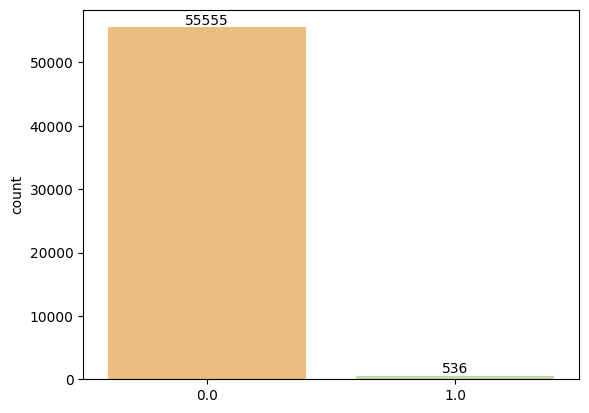

In [224]:
# Plot the distribution of target values
target_distribution= sns.barplot(x=df_train_cleaned['drafted'].unique(),
                                y=df_train_cleaned['drafted'].value_counts(),
                                data=df_train_cleaned,
                                palette='Spectral'
                                )

target_distribution.bar_label(target_distribution.containers[0])

The target variable 'drafted' is biased towards value 0 being 99% (55,555 records) of the total values. Therefore, we will address this issue with SMOTE technique before training the model. 

In [225]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [226]:
from imblearn.over_sampling import SMOTE

In [227]:
# Instantiate the SMOTE method with sampling_strategy='minority' and save as a variable called smote
smote = SMOTE(sampling_strategy='minority')

In [228]:
# Import the pop_target() frunction from the my_krml_14195743 custom package
from my_krml_14195743.data.sets import pop_target

In [229]:
# Use pop_target() frunction to extract the column 'drafted' and save the results into 2 variables called features and target
features, target = pop_target(df_train_cleaned, 'drafted')

In [230]:
# Apply the smote to the features and target
features, target = smote.fit_resample(features, target)

# Display number of each target variable value
target.value_counts()

drafted
0.0    55555
1.0    55555
Name: count, dtype: int64

# 4. Feature Elimination with Correlation Matrix

Next, we will assess the relationship between the features. By saying that, those with correlation higher than 0.9 will be removed from the dataset.

In [231]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

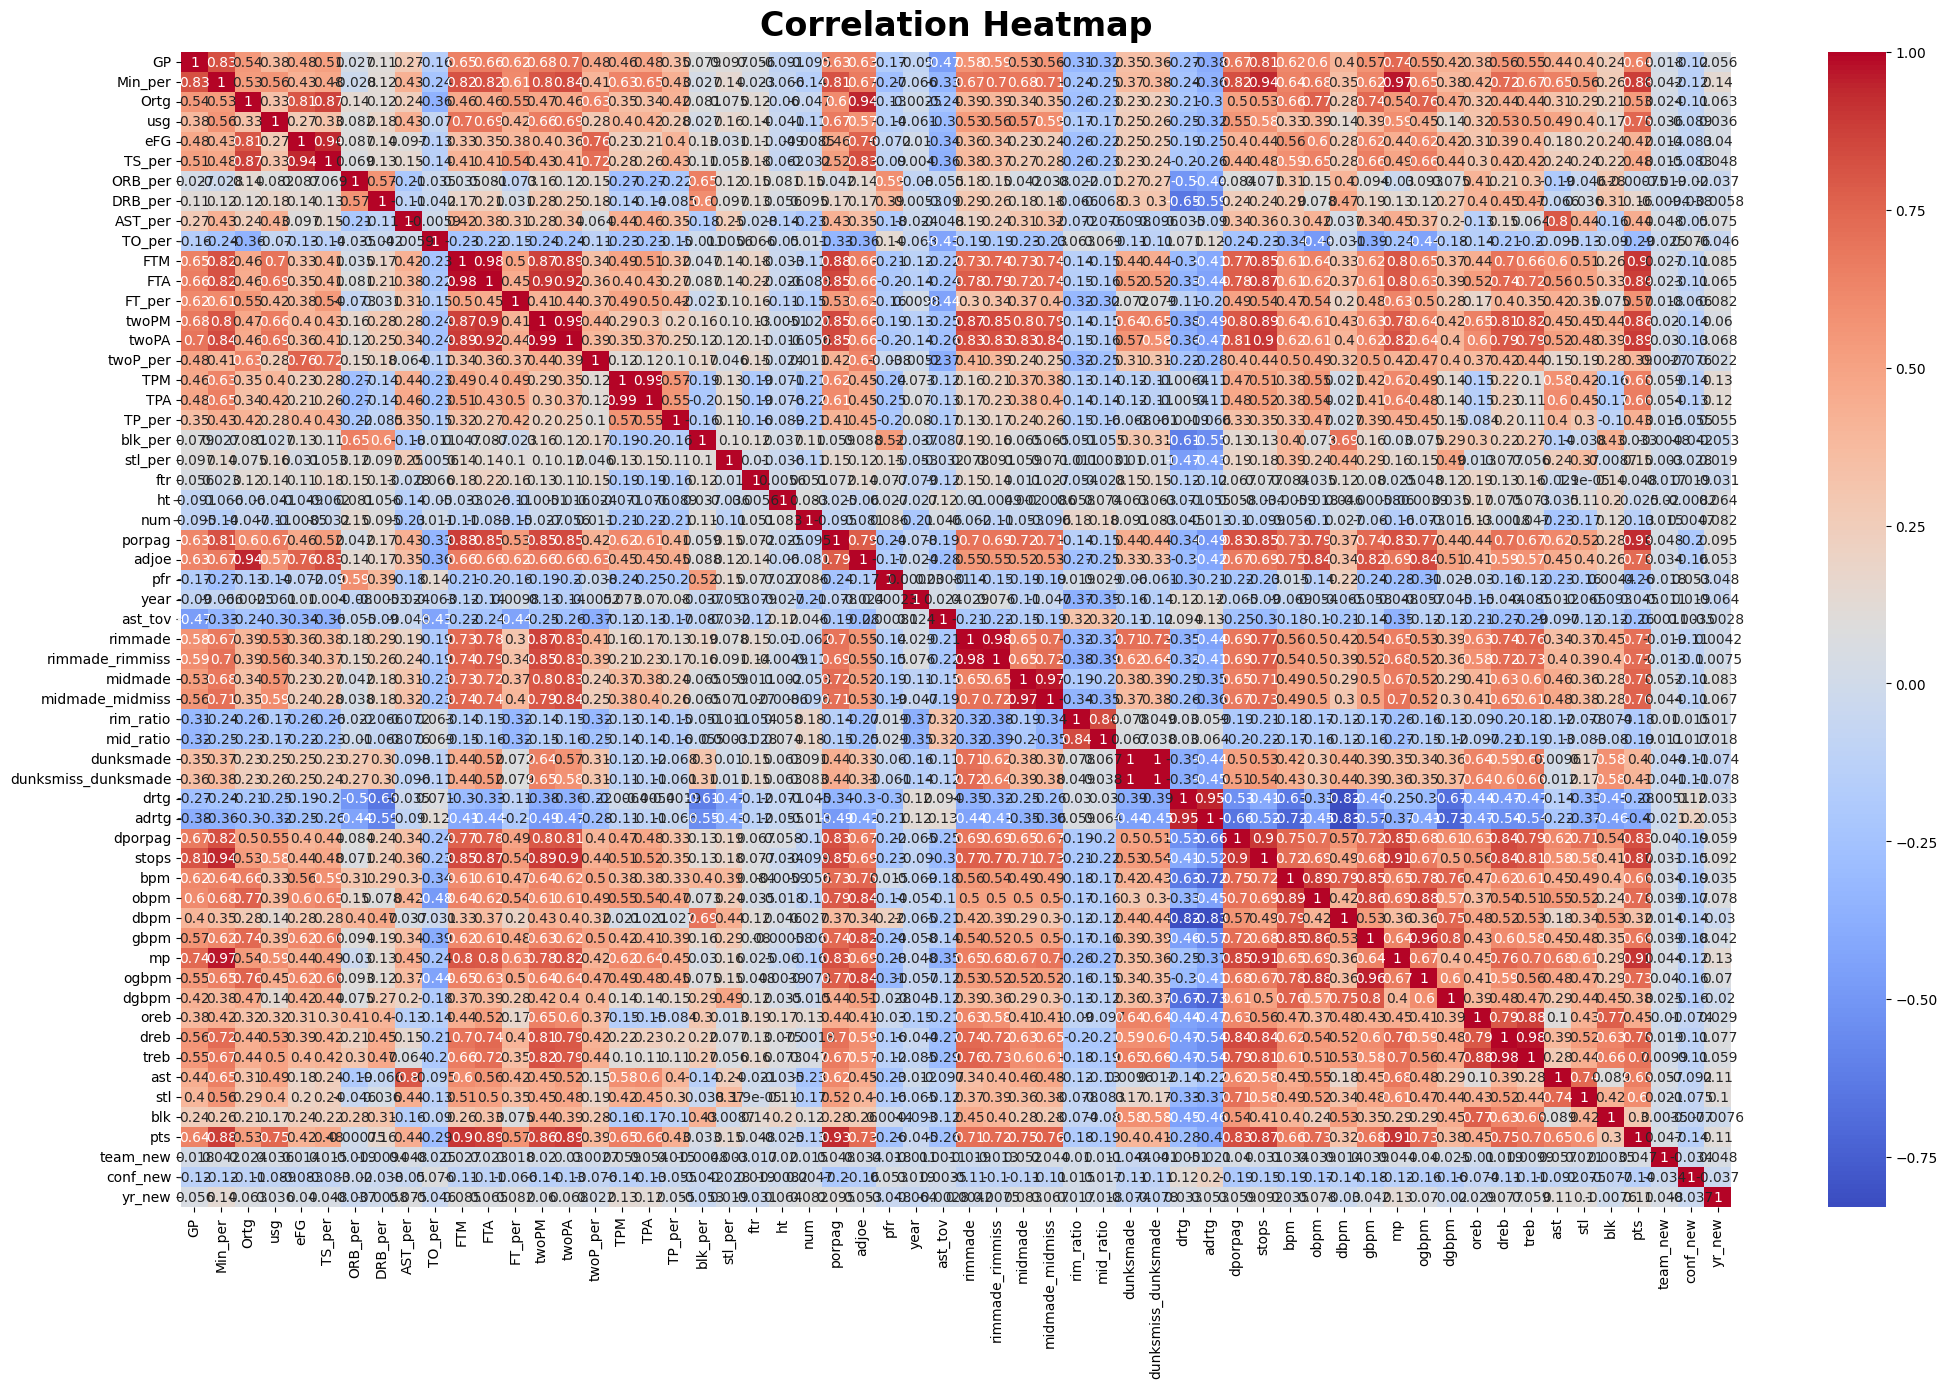

In [232]:
# Plot the heatmap showing correlation between features
corr = features.corr()
plt.figure(figsize=(25,15))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24, 'fontweight':'bold'}, pad=12)

In [233]:
# Based on the correlation matrix, remove features that have correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [234]:
# Store the remaining columns as a variable called selected_columns_train
selected_columns_train = features.columns[columns]
selected_columns_train

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'ORB_per', 'DRB_per', 'AST_per',
       'TO_per', 'FTM', 'FT_per', 'twoP_per', 'TPM', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'ht', 'num', 'porpag', 'pfr', 'year', 'ast_tov',
       'rimmade', 'midmade', 'rim_ratio', 'mid_ratio', 'dunksmade', 'drtg',
       'dporpag', 'bpm', 'obpm', 'dbpm', 'gbpm', 'dgbpm', 'oreb', 'dreb',
       'ast', 'stl', 'blk', 'team_new', 'conf_new', 'yr_new'],
      dtype='object')

In [235]:
# Create a dataframe with selected columns and save as features_new
features_new = features[selected_columns_train]
features_new

,GP,Min_per,Ortg,usg,eFG,ORB_per,DRB_per,AST_per,TO_per,FTM,...,gbpm,dgbpm,oreb,dreb,ast,stl,blk,team_new,conf_new,yr_new
0,26,29.500000,97.300000,16.600000,42.500000,1.600000,4.600000,15.800000,16.300000,10,...,-4.723150,-1.941150,0.192300,0.615400,1.192300,0.346200,0.038500,267,27,5
1,34,60.900000,108.300000,14.900000,52.400000,3.800000,6.300000,13.600000,19.800000,30,...,-0.300196,-0.247934,0.676500,1.264700,1.823500,0.411800,0.235300,327,33,5
2,27,72.000000,96.200000,21.800000,45.700000,2.100000,8.000000,14.700000,15.900000,45,...,0.665065,-0.883163,0.629600,2.333300,1.963000,0.481500,0.000000,272,7,6
3,30,44.500000,97.700000,16.000000,53.600000,4.100000,9.400000,13.700000,23.800000,14,...,-0.736233,-0.393459,0.700000,1.433300,1.100000,0.566700,0.133300,231,34,6
4,33,56.200000,96.500000,22.000000,52.800000,8.300000,18.600000,8.200000,22.700000,64,...,-2.353180,-0.668318,1.424200,3.303000,0.848500,0.454500,0.333300,228,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111105,21,28.839375,108.572691,23.467692,59.692163,5.215866,14.215673,15.862163,22.682212,45,...,4.312522,2.416450,0.710013,2.361167,2.042413,0.747053,0.850791,69,0,3
111106,37,84.426622,114.462848,29.342797,49.431424,2.685594,12.220977,31.422241,12.952401,143,...,8.786065,1.372946,0.796111,3.695179,5.447413,1.018963,0.357299,214,5,5
111107,37,89.558612,123.633221,25.302539,54.573508,3.219975,10.111807,26.955860,13.253533,170,...,8.390208,1.201367,0.867686,3.194535,5.247785,1.325474,0.472958,226,1,5
111108,31,74.154604,109.810009,33.763813,53.979550,7.921466,23.551124,34.545027,20.882014,141,...,11.147754,4.189962,2.116062,7.048091,5.484628,1.682627,0.918629,221,5,4


From 62 features in the original training dataset, after performing the feature selection, there are only 43 features left.

In [236]:
# Store the remaining columns as a variable called selected_columns
selected_columns_test = df_test_cleaned.columns[columns]
selected_columns_test

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'ORB_per', 'DRB_per', 'AST_per',
       'TO_per', 'FTM', 'FT_per', 'twoP_per', 'TPM', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'ht', 'num', 'porpag', 'pfr', 'year', 'ast_tov',
       'rimmade', 'midmade', 'rim_ratio', 'mid_ratio', 'dunksmade', 'drtg',
       'dporpag', 'bpm', 'obpm', 'dbpm', 'gbpm', 'dgbpm', 'oreb', 'dreb',
       'ast', 'stl', 'blk', 'team_new', 'conf_new', 'yr_new'],
      dtype='object')

In [237]:
# Create a dataframe with selected columns and save as df_test_cleaned
df_test_new = df_test_cleaned[selected_columns_test]
df_test_new

,GP,Min_per,Ortg,usg,eFG,ORB_per,DRB_per,AST_per,TO_per,FTM,...,gbpm,dgbpm,oreb,dreb,ast,stl,blk,team_new,conf_new,yr_new
0,2,3.0,115.1,4.7,50.0,0.0,4.6,0.0,0.0,0,...,-4.743390,-2.275660,0.0000,0.3333,0.0000,0.0000,0.0000,178,16,3
1,11,17.6,61.1,18.6,34.7,2.5,15.7,8.1,30.4,1,...,-11.907200,-4.412530,0.2727,1.4545,0.4545,0.1818,0.0000,258,16,3
2,9,28.6,91.9,23.8,54.1,6.4,22.5,10.0,21.9,14,...,-1.207060,1.717890,1.3333,4.4444,1.0000,0.6667,1.8889,23,2,3
3,7,1.3,111.0,10.4,83.3,0.0,13.4,0.0,33.6,0,...,0.194558,0.962469,0.0000,0.2857,0.0000,0.0000,0.0000,115,5,3
4,23,78.5,103.1,21.5,54.0,3.6,10.2,7.8,16.1,31,...,1.874610,-1.019000,1.0435,2.8696,1.1739,0.8261,0.0870,123,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2,0.3,60.5,19.3,0.0,0.0,0.0,51.1,0.0,0,...,18.161500,16.018200,0.0000,0.0000,0.5000,0.5000,0.0000,325,7,0
4966,4,1.3,28.3,7.1,0.0,7.0,0.0,0.0,50.3,0,...,-12.236100,-4.993820,0.2500,0.0000,0.0000,0.0000,0.0000,209,27,0
4967,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,-4.651630,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,294,4,0
4968,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,-4.256800,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,289,6,0


# 5. Scale Data

In [238]:
# Import StandardScaler from scikit-learn to scale the data
from sklearn.preprocessing import StandardScaler

In [239]:
# Instantiate the StandardScaler method and save as a variable called scaler
scaler = StandardScaler()

In [240]:
# Fit and apply the scaling on features and convert it back to a dataframe called features
features_new = pd.DataFrame(scaler.fit_transform(features_new), columns=features_new.columns)

In [241]:
# Import dump from joblib
from joblib import dump

In [242]:
# Save scaler into the folder models and call the file as scaler.joblib
dump(scaler, '../models/scaler_ver2.joblib')

['../models/scaler_ver2.joblib']

# 6. Split Dataset

The testing dataset has no target variable, so we cannot use it to assess the model performance. Therefore, from the training dataset, we need to split it into training and validation sets.

In [243]:
# Import the function train_test_split from scikitlearn
from sklearn.model_selection import train_test_split

In [244]:
# Split the training dataset to training data (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(features_new, target, test_size=0.2)

In [245]:
# Assign df_test_cleaned as an variable called X_test
X_test = df_test_new

In [246]:
# Print the shape of X_train, X_val and X_test
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(88888, 43)
(22222, 43)
(4970, 43)


In [247]:
# Print the dimensions of y_train, y_val
print(y_train.shape)
print(y_val.shape)

(88888,)
(22222,)


In [249]:
# Save the sets to folder data/processed
pd.DataFrame(X_train).to_csv('../data/processed/X_train_wk3.csv', index=False)
pd.DataFrame(X_val).to_csv('../data/processed/X_val_wk3.csv', index=False)
pd.DataFrame(X_test).to_csv('../data/processed/X_test_wk3.csv', index=False)
pd.DataFrame(y_train).to_csv('../data/processed/y_train_wk3.csv', index=False)
pd.DataFrame(y_val).to_csv('../data/processed/y_val_wk3.csv', index=False)

# 7. Assess Baseline Model

In [250]:
# Find the value which is most present in the target variable
y_mode = y_train.mode()
y_mode

0    0.0
Name: drafted, dtype: float64

In [251]:
# Create a numpy array with the same dimensions as for the training set called y_base filled with this value
y_base = np.full((len(y_train), 1), y_mode)

In [252]:
# Import the roc_auc_score from scikit-learn to evaluate the model performance
from sklearn.metrics import roc_curve, roc_auc_score

In [253]:
# Calculate the AUROC score of the training dataset
reg_auc_base = roc_auc_score(y_train, y_base)
reg_auc_base

0.5